In [1]:
# Use qt backend for matplotlab to use interactive mne plots
# %matplotlib qt

In [2]:
import mne 
import analysis.processing
import matplotlib.pyplot as plt
import pandas as pd
import csv 

mne.set_log_level(verbose='WARNING', return_old_level=False, add_frames=None)

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 # 200 

C:\Users\erang\AppData\Local\Temp\ipykernel_4060\3062641521.py:19: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  fig  =  mne.viz.plot_compare_evokeds(evokeds, picks=['7Z'], styles = {"Oddball": {"color" :'red'}, "Control":{"color": 'blue'}})


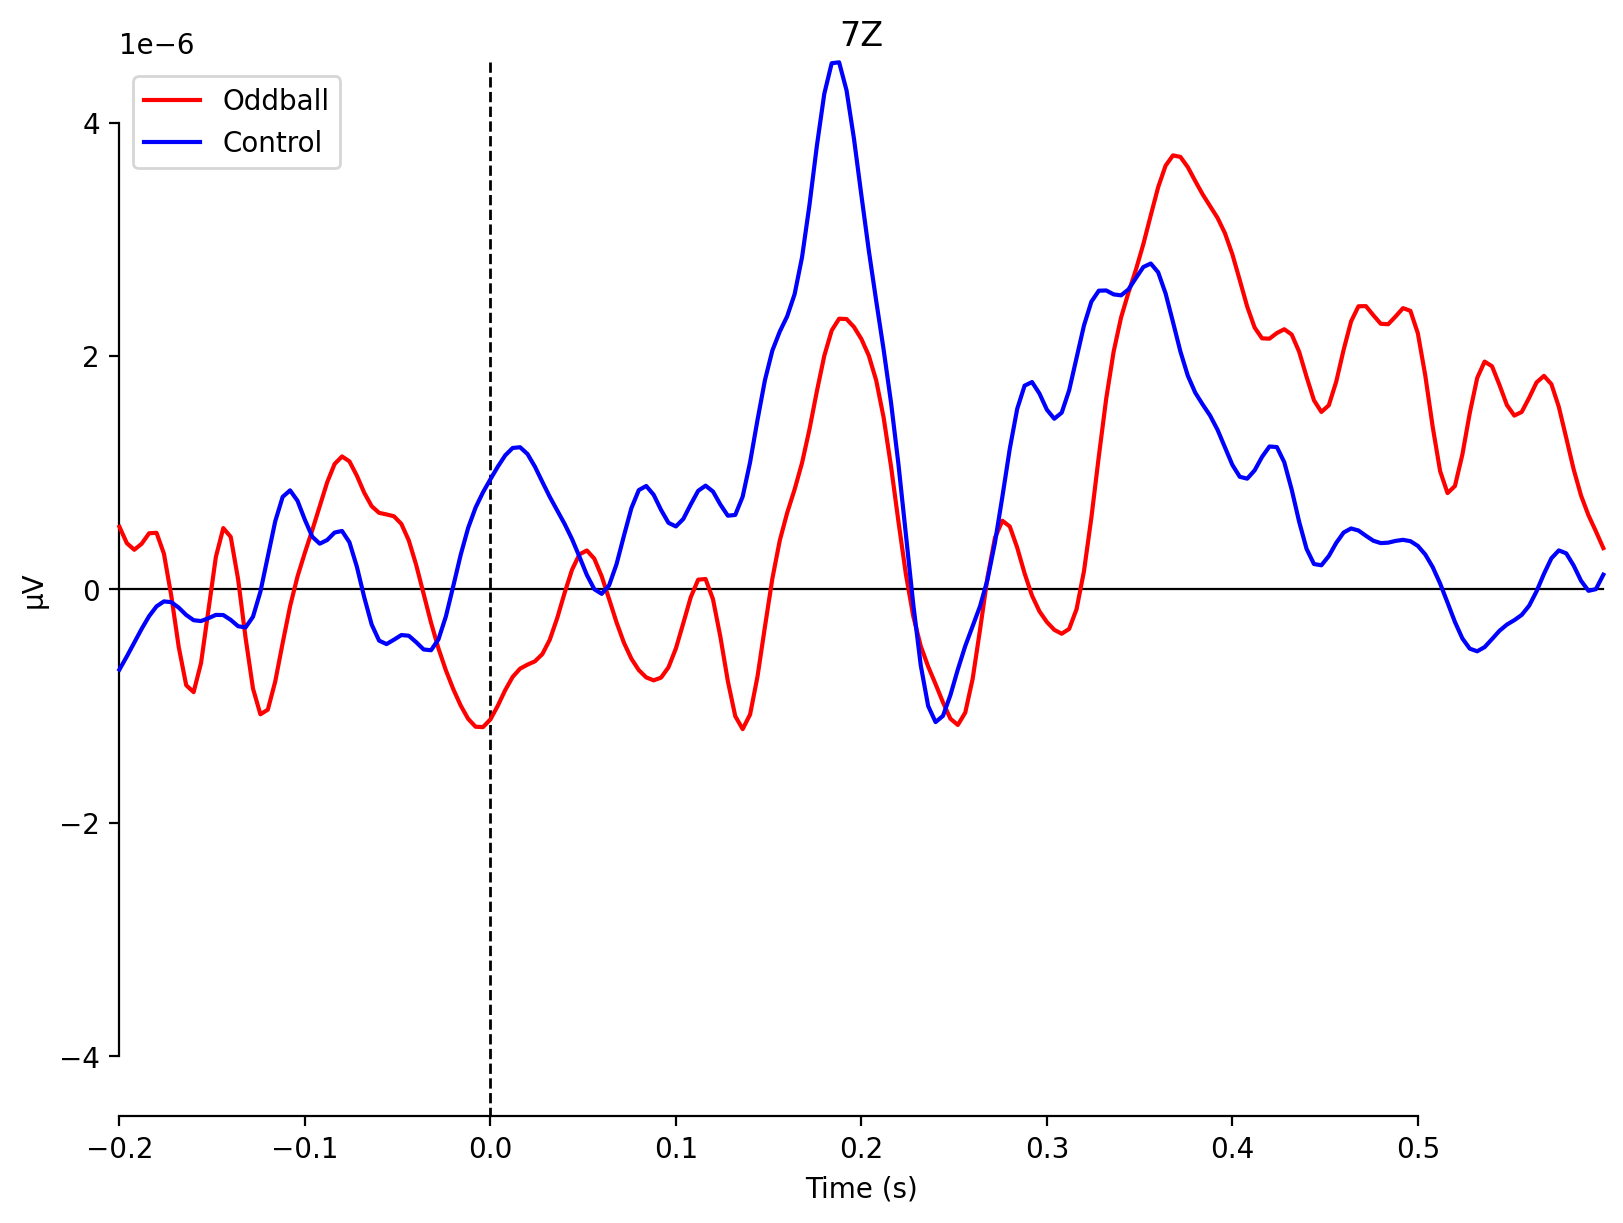

In [4]:
participant_id = 1

# loading data
raw = analysis.processing.loadData(participant_id)

# preprocessig 
raw = analysis.processing.preprocessing(raw) 

#generate epochs
epochs_1, event_dict = analysis.processing.eventEpochdata(raw)


oddball = epochs_1["visual/image_display/onset/stimulus/non_freq"].average()
control = epochs_1["visual/image_display/onset/stimulus/freq"].average()

#PZ ~ 7Z

evokeds = dict(Oddball=oddball, Control=control)
fig  =  mne.viz.plot_compare_evokeds(evokeds, picks=['7Z'], styles = {"Oddball": {"color" :'red'}, "Control":{"color": 'blue'}})

In [5]:
# read group evokeds

oddball_list = []
control_list = []

for pnum in (1, 3, 4, 5, 7, 8, 9, 10, 11, 12):
    raw = analysis.processing.loadData(pnum)

    # preprocessig 
    raw = analysis.processing.preprocessing(raw)
    epochs, event_dict = analysis.processing.eventEpochdata(raw)


    oddball = epochs["visual/image_display/onset/stimulus/non_freq"].average()
    control = epochs["visual/image_display/onset/stimulus/freq"].average()
    oddball_list.append(oddball)
    control_list.append(control)



title= "ERP"
roi =['7Z']

evokeds = dict(
    oddball=  oddball_list,
    control= control_list,
)

Non inverted Y axis

C:\Users\erang\AppData\Local\Temp\ipykernel_4060\1973393869.py:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(evokeds, picks= roi, ci = 0.9 ,


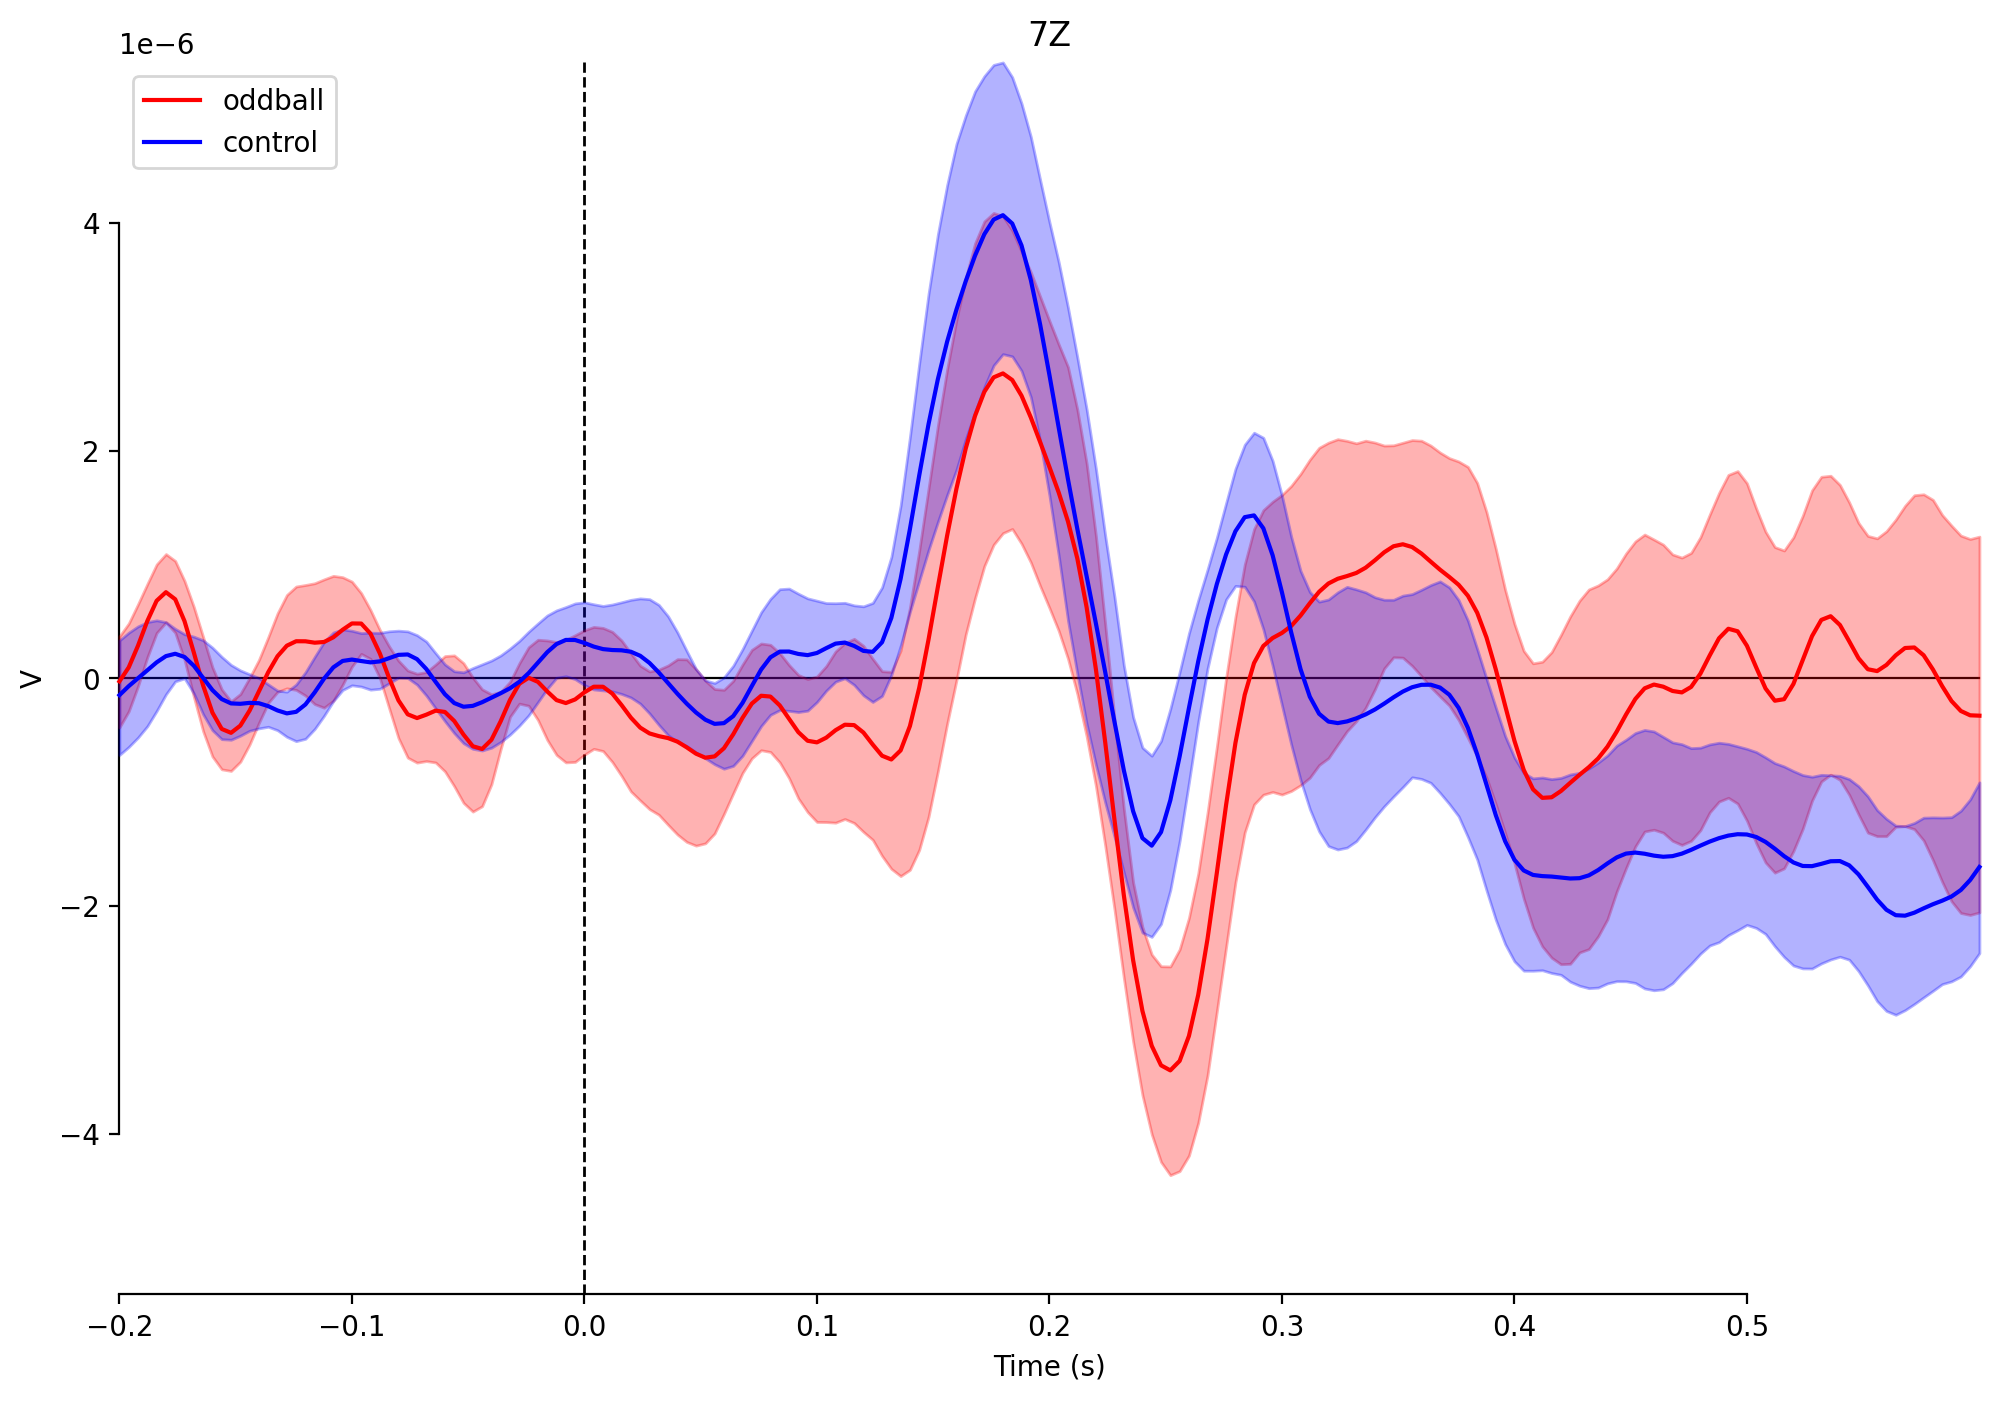

In [6]:
#plot evokeds at 0.9 CI
fig, ax = plt.subplots()
mne.viz.plot_compare_evokeds(evokeds, picks= roi, ci = 0.9 , 
                             styles = {"oddball": {"color" :'red'}, 
                                       "control":{"color": 'blue'}}, 
                                       show =False, axes = ax )
ax.set_ylabel("V")

plt.show()

C:\Users\erang\AppData\Local\Temp\ipykernel_4060\4179641753.py:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(evokeds, picks= roi, ci = 0.8 ,


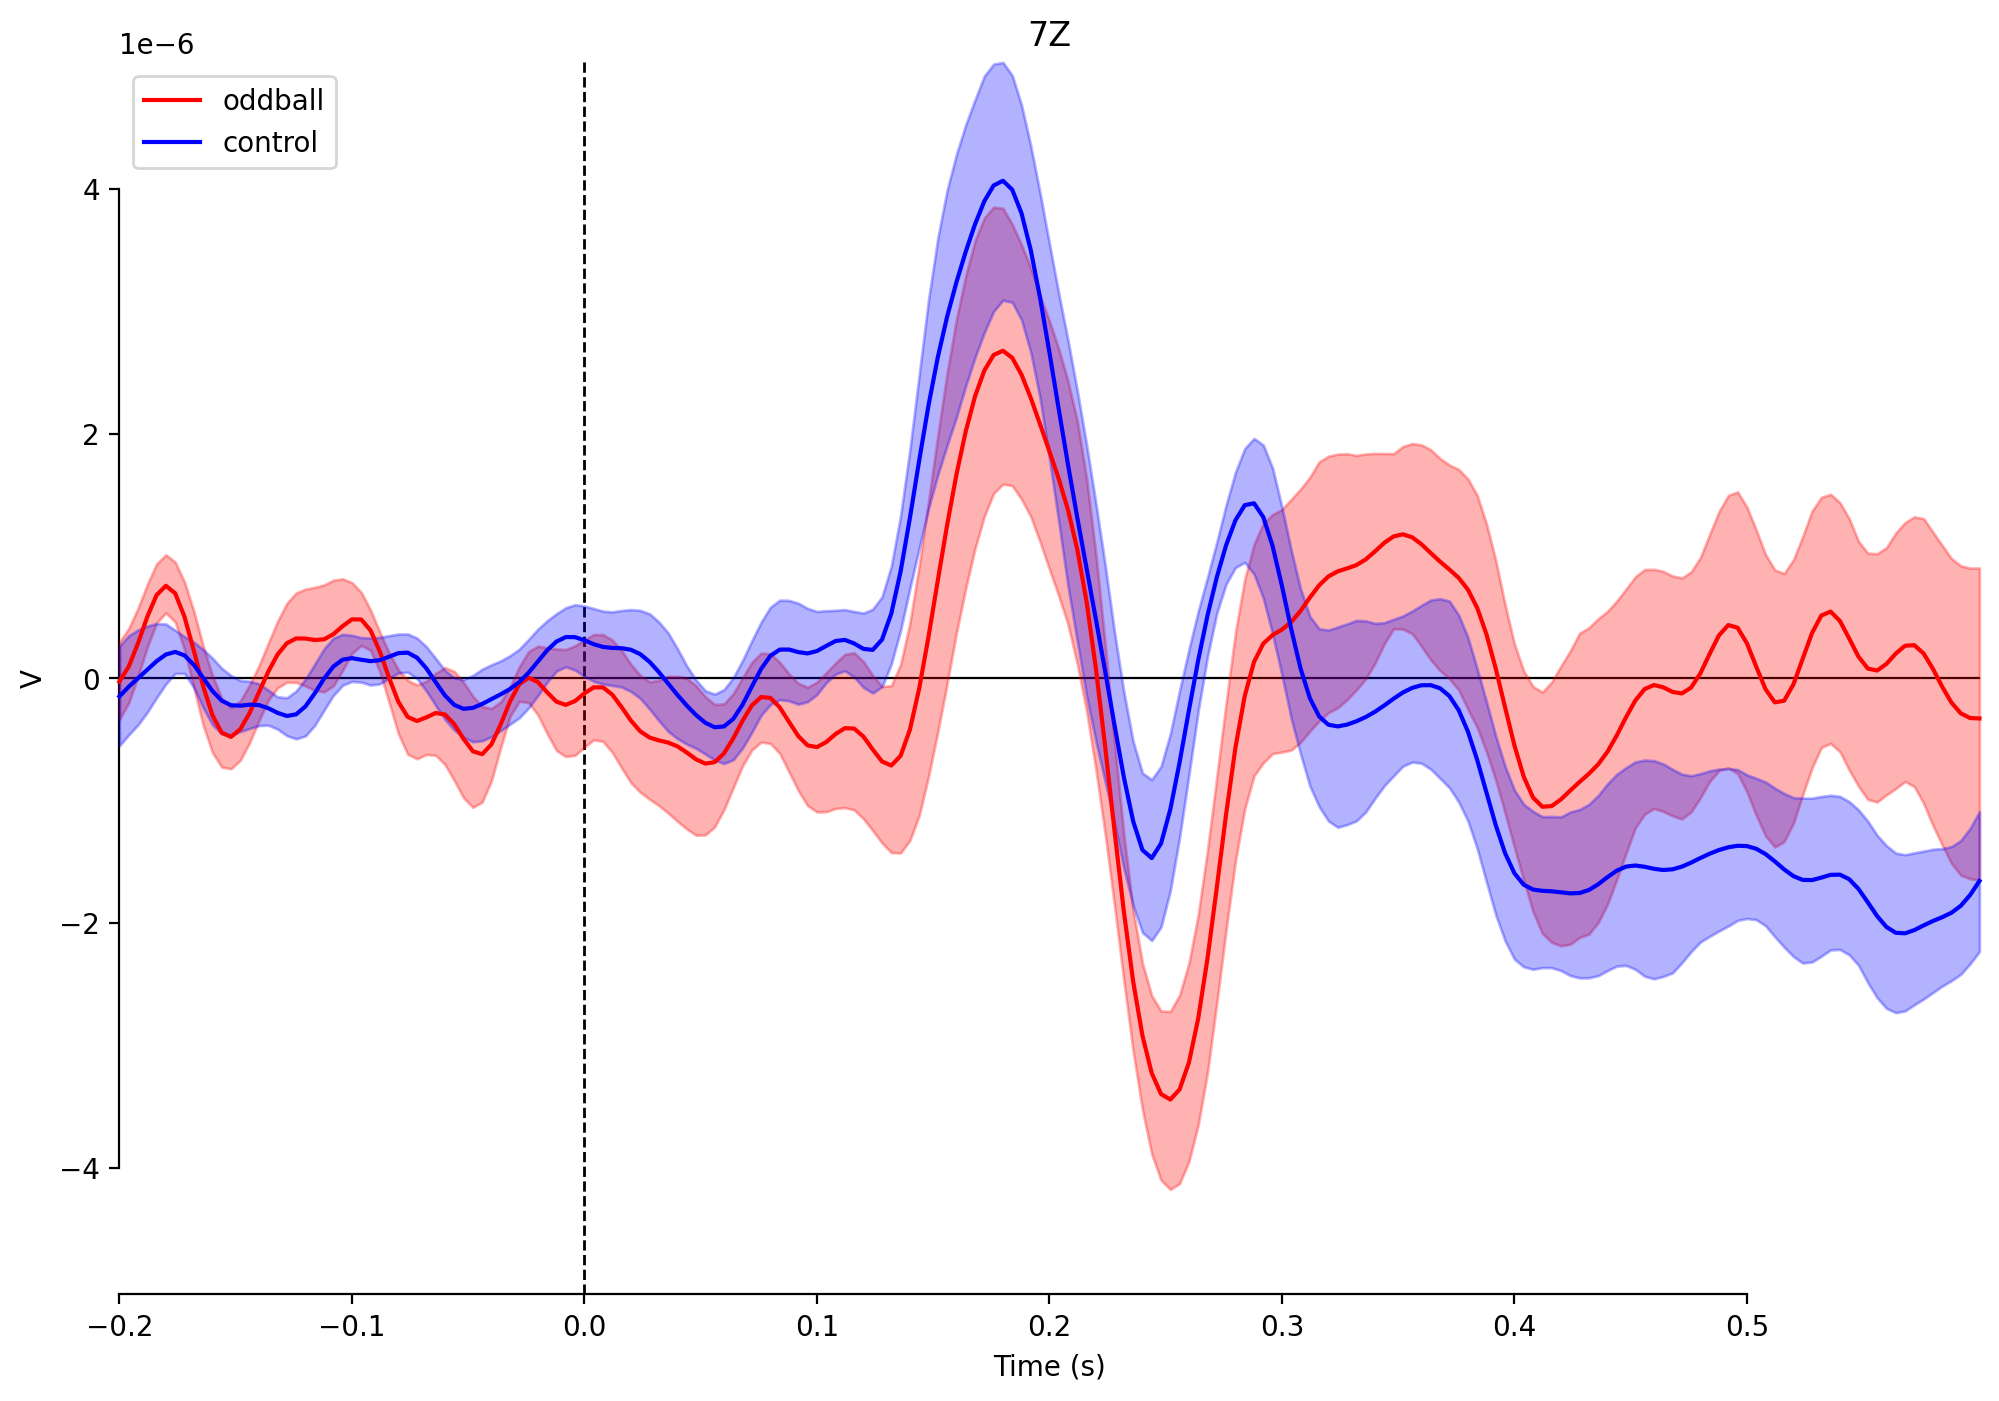

In [7]:
#plot evokeds at 0.8 CI
fig, ax = plt.subplots()
mne.viz.plot_compare_evokeds(evokeds, picks= roi, ci = 0.8 , 
                             styles = {"oddball": {"color" :'red'}, 
                                       "control":{"color": 'blue'}}, 
                                       show =False, axes = ax )
ax.set_ylabel("V")

plt.show()

Inverted

C:\Users\erang\AppData\Local\Temp\ipykernel_4060\3062121985.py:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(evokeds, picks= roi, ci = 0.9 ,


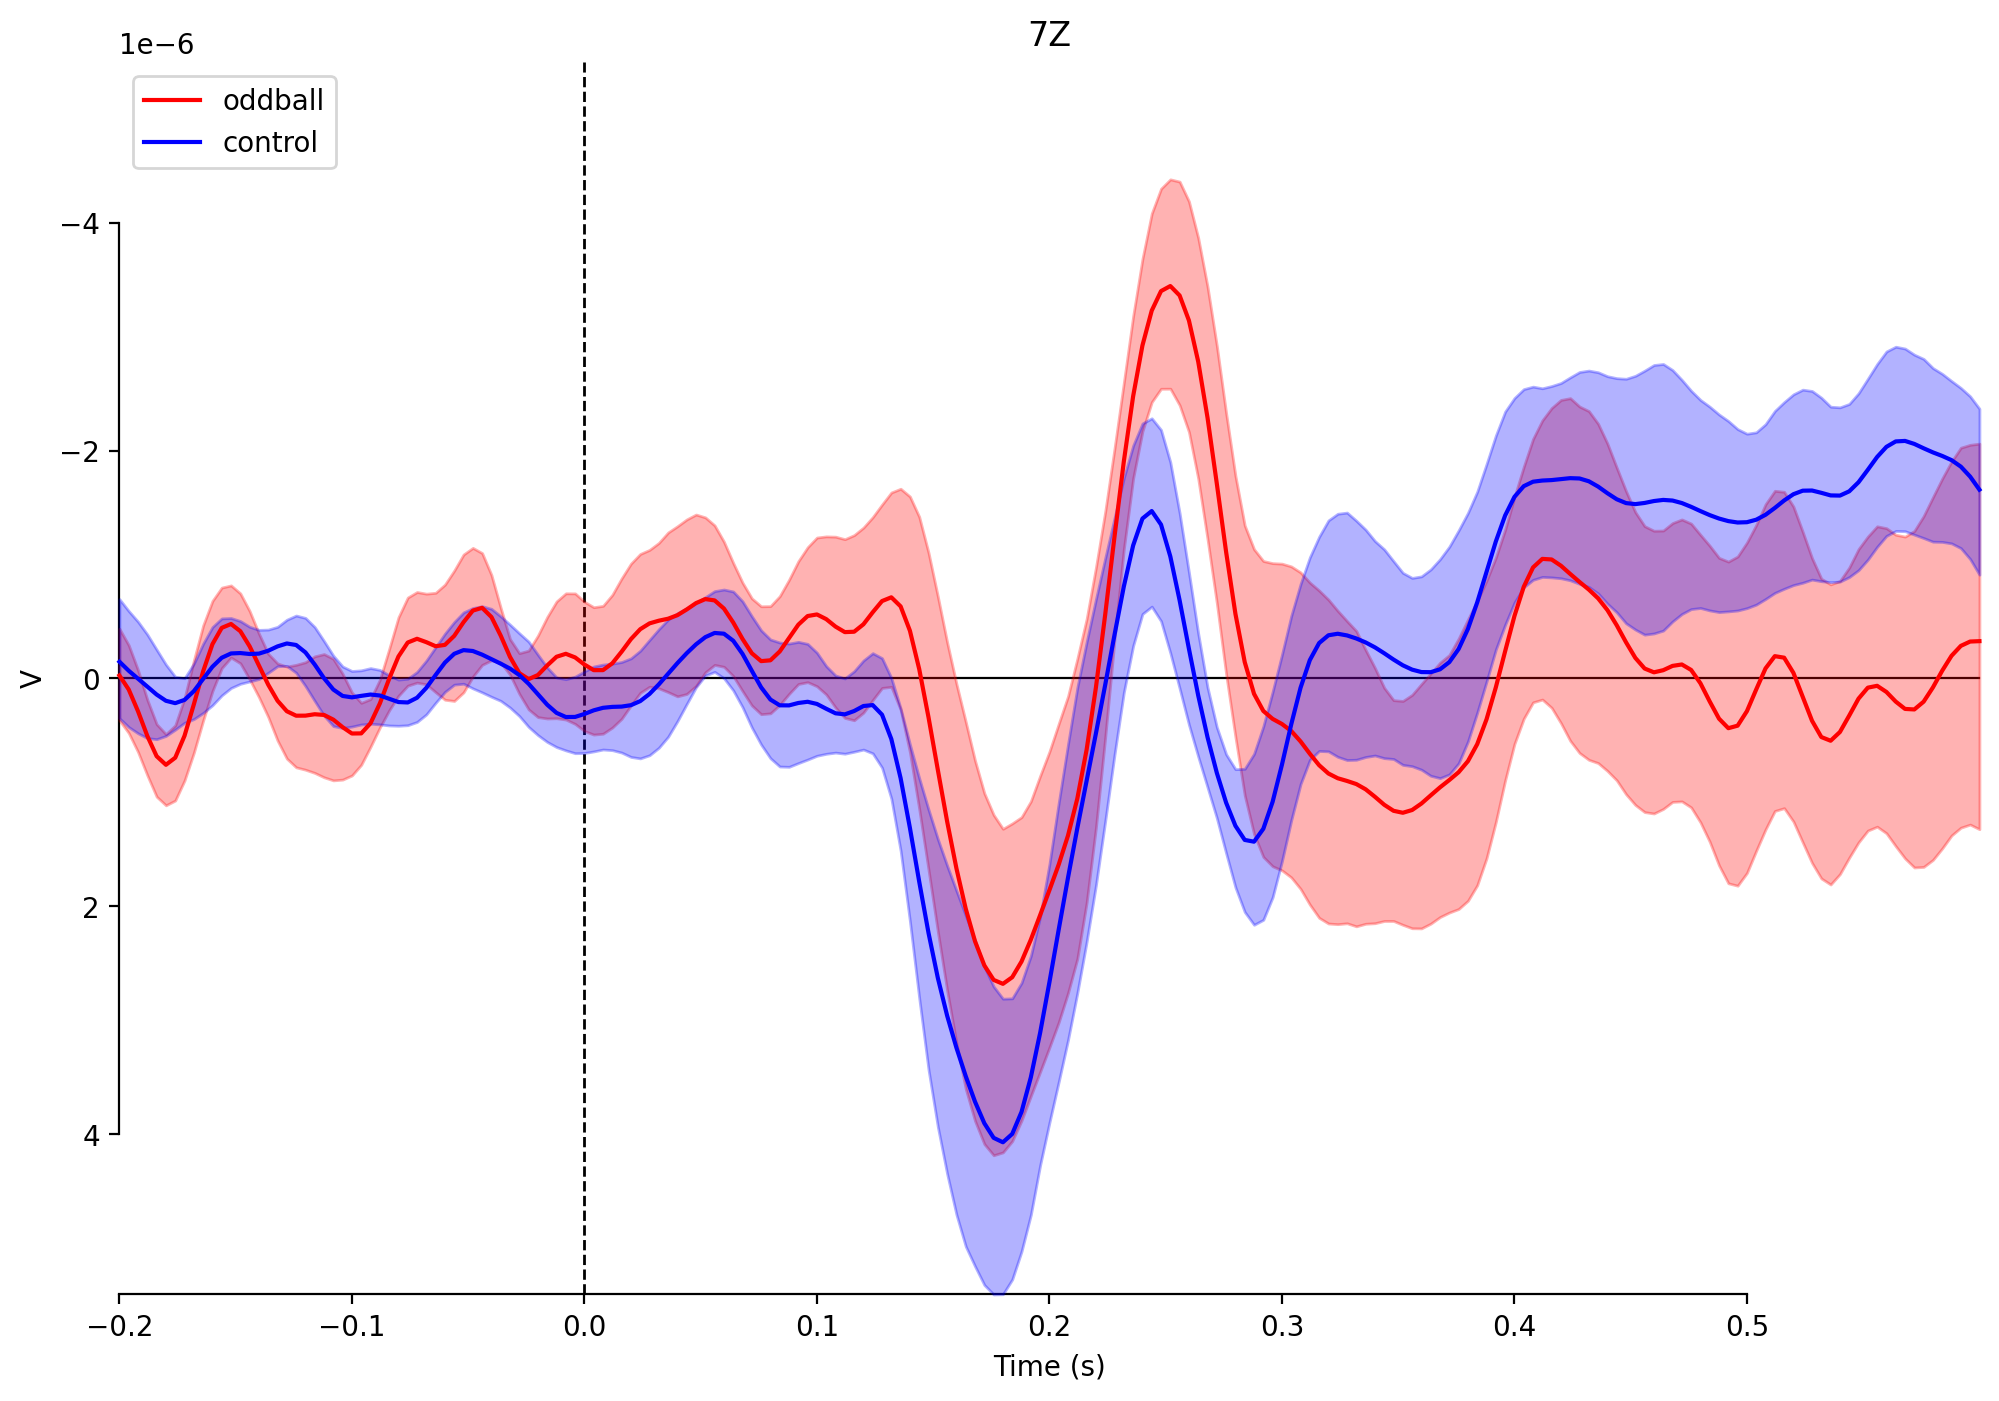

In [8]:
#plot evokeds at 0.9 CI
fig, ax = plt.subplots()
mne.viz.plot_compare_evokeds(evokeds, picks= roi, ci = 0.9 , 
                             styles = {"oddball": {"color" :'red'}, 
                                       "control":{"color": 'blue'}}, 
                                       show =False, axes = ax )
ax.invert_yaxis()
ax.set_ylabel("V")

plt.show()

C:\Users\erang\AppData\Local\Temp\ipykernel_4060\2273583246.py:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(evokeds, picks= roi, ci = 0.9 ,


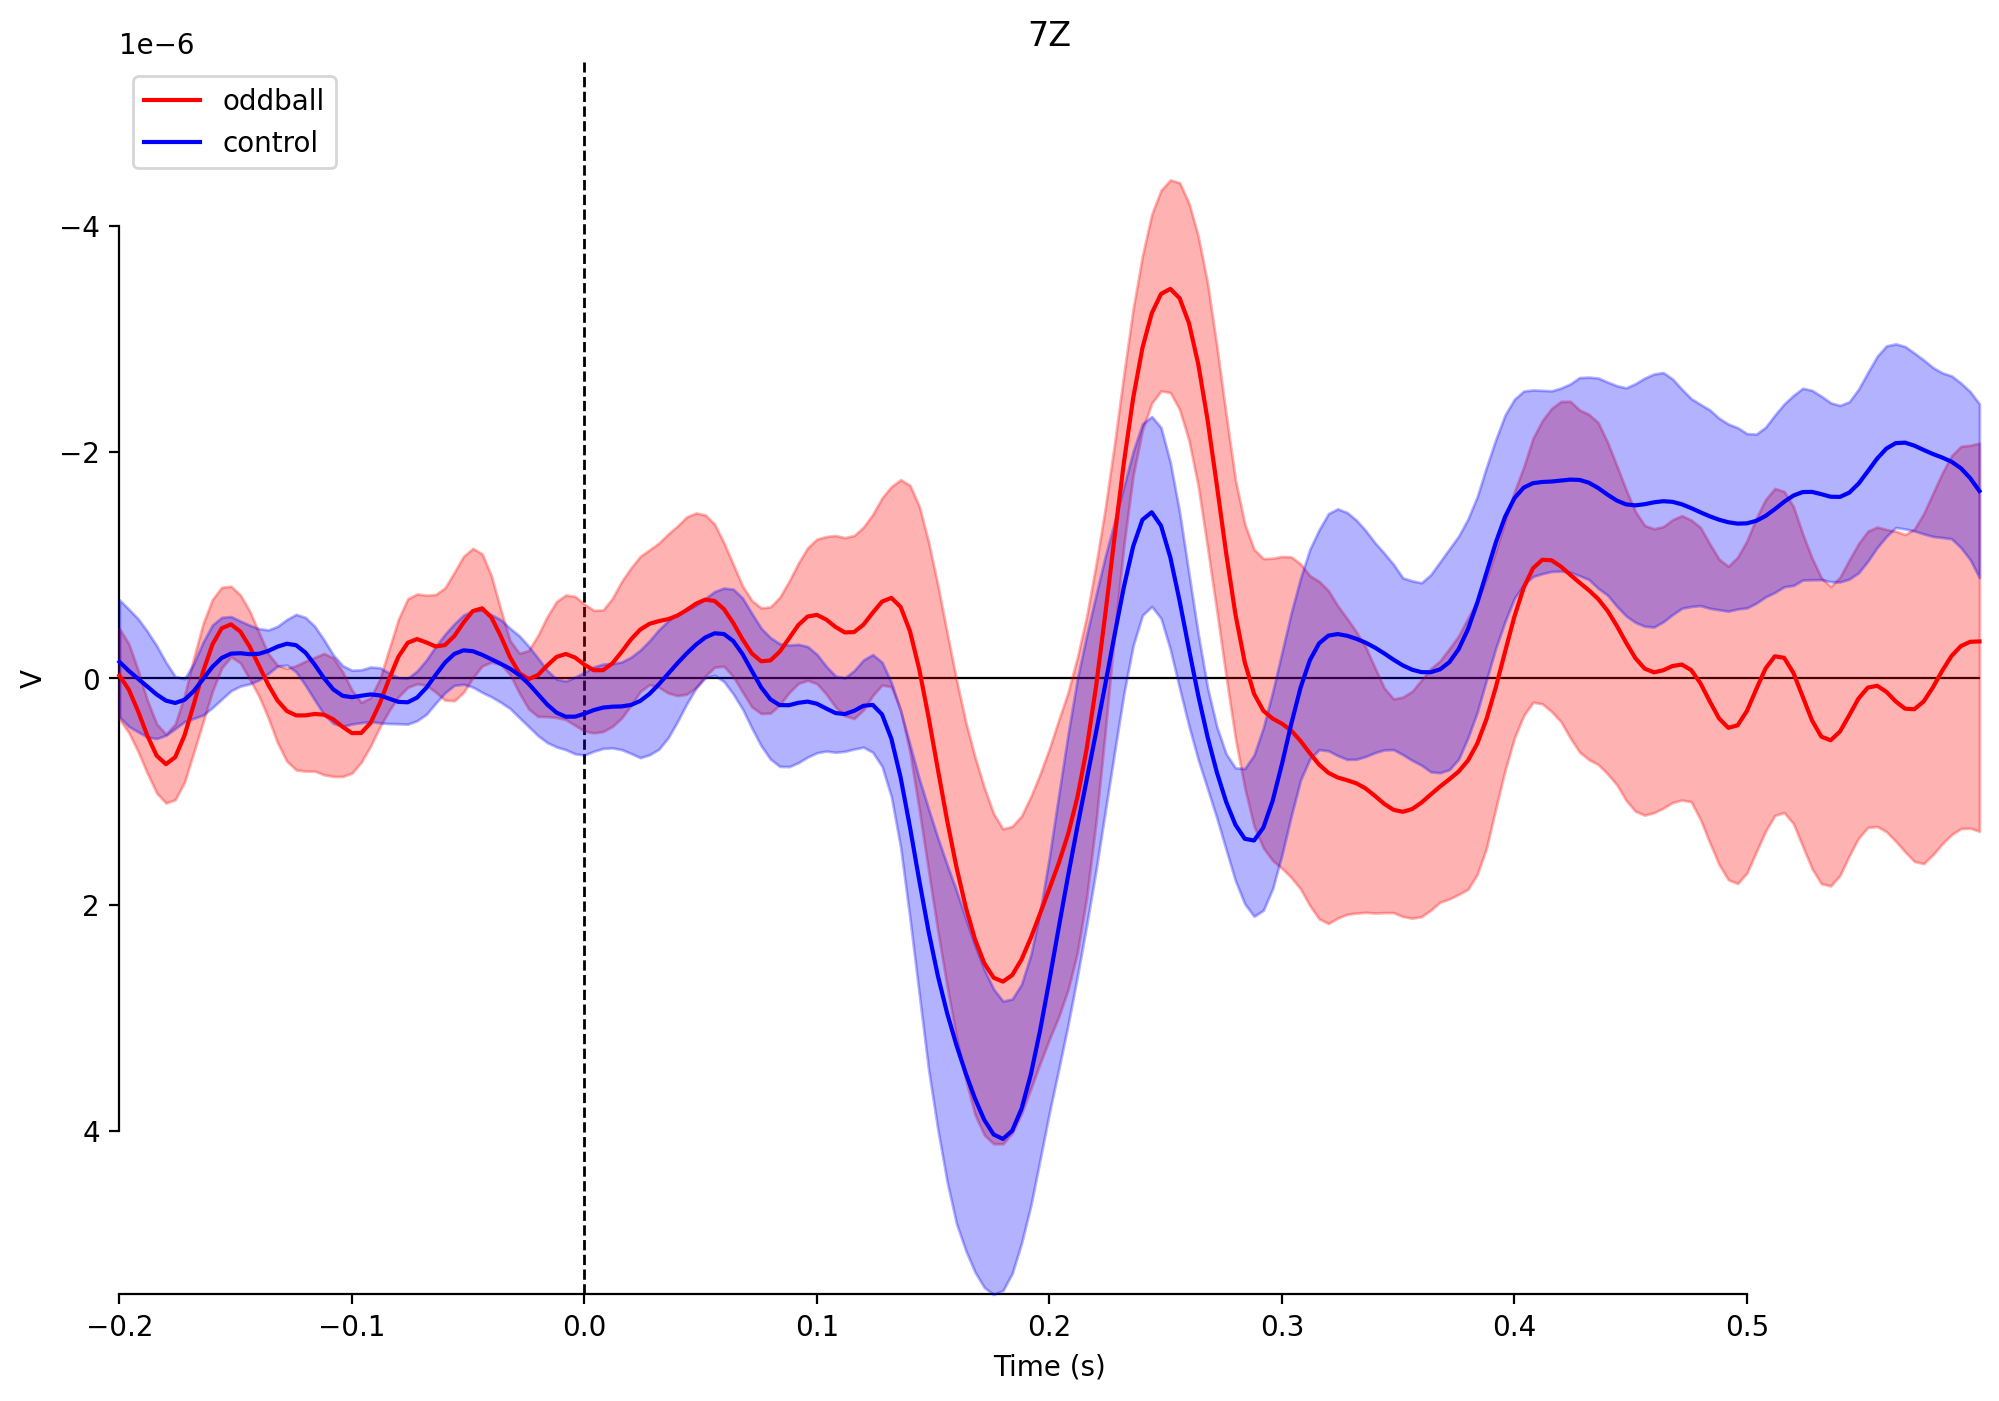

In [9]:
#plot evokeds at 0.8 CI
fig, ax = plt.subplots()
mne.viz.plot_compare_evokeds(evokeds, picks= roi, ci = 0.9 , 
                             styles = {"oddball": {"color" :'red'}, 
                                       "control":{"color": 'blue'}}, 
                                       show =False, axes = ax )
ax.invert_yaxis()
ax.set_ylabel("V")

plt.show()

In [10]:
diff_waves = []
for i in range(len(oddball_list)):
    diff_waves.append(mne.combine_evoked([oddball_list[i], control_list[i]], weights=[-1, 1]))

C:\Users\erang\AppData\Local\Temp\ipykernel_4060\1335212416.py:3: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds({contrast:diff_waves},


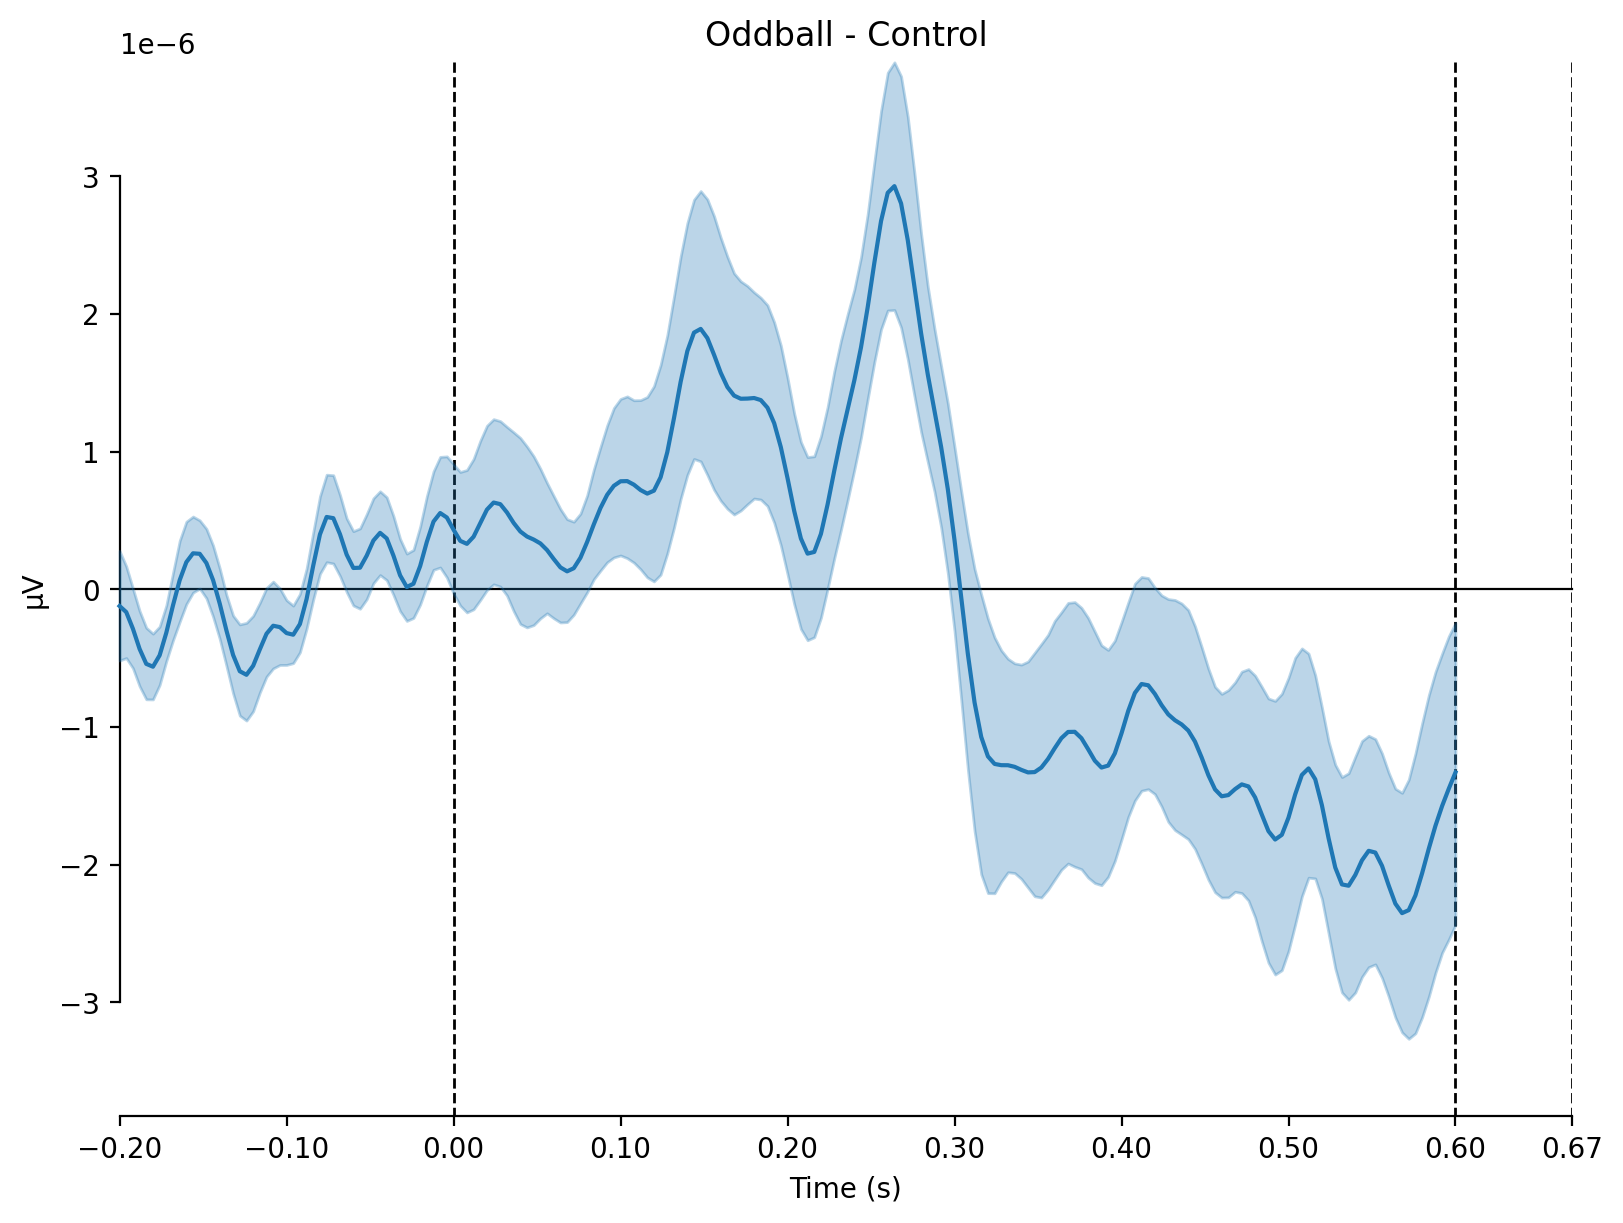

In [11]:
import matplotlib.pyplot as plt
contrast = 'Oddball - Control'
mne.viz.plot_compare_evokeds({contrast:diff_waves},
                            legend=None, title=contrast,
                             picks=roi, ci =0.8, vlines = [0.0, 0.6, 0.67]
                            )
plt.show()